# Part 1 < EDA (탐색적 데이터 분석) >

1) 예술의 전당 콘서트홀의 특성  
  
2) 고객 특성  
  
3) 장르 분석  
  
4) 공연 수요 분석  
    
5) 고객 만족도, 수익성, 공공성 분석 결과  

# Import

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings(action = 'ignore') 
pd.options.display.max_columns = None
import matplotlib
from matplotlib import font_manager, rc
import platform
sns.set(style="whitegrid")
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df1 = pd.read_csv('data/2023빅콘테스트_어드밴스드리그_예술의전당.csv')
df = df1.query('place == "콘서트홀"').reset_index(drop=True)

# 결측치 확인

In [3]:
for col in df.columns:
    msg = f'{col:>10} \t {100 * df[col].isnull().mean():.2f}%'
    print(msg)

       age 	 55.83%
    gender 	 55.80%
membership_type_1 	 55.80%
membership_type_2 	 64.47%
membership_type_3 	 87.19%
membership_type_4 	 97.71%
membership_type_5 	 99.90%
membership_type_6 	 100.00%
 tran_date 	 0.00%
 tran_time 	 0.00%
 play_date 	 0.00%
play_st_time 	 0.00%
      seat 	 0.00%
     price 	 0.00%
ticket_cancel 	 0.00%
discount_type 	 0.00%
performance_code 	 0.00%
pre_open_date 	 36.07%
 open_date 	 0.00%
     genre 	 2.29%
     place 	 0.00%
running_time 	 0.00%
intermission 	 0.00%
 member_yn 	 0.00%


# EDA

## 1. 예술의 전당 콘서트홀의 특성

- 전체 데이터에 대한 콘서트홀의 비율은 약 57%이다.

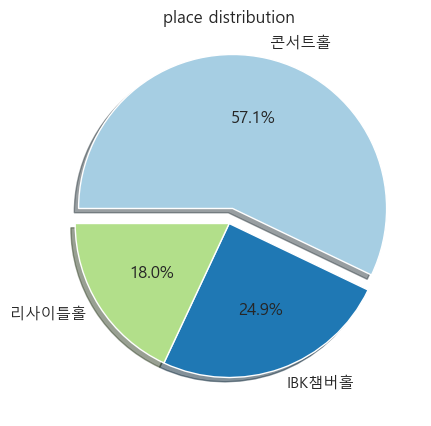

In [4]:
age_distribution = df1['place'].value_counts()

custom_palette = sns.color_palette("Paired", len(age_distribution))

explode = (0.1,) + (0,) * (len(age_distribution) - 1)

plt.figure(figsize=(5, 5))
plt.pie(age_distribution, labels=age_distribution.index, startangle=180, explode=explode, autopct='%1.1f%%', colors=custom_palette, shadow=True, counterclock=False)

plt.title('place distribution')

plt.show()

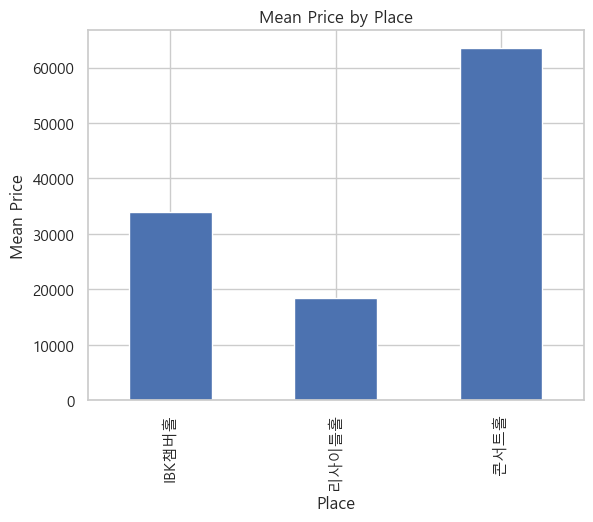

In [5]:
# 다른 공연장에 비해 월등히 높은 평균 가격 형성 
result = df1.query('price != 0').groupby('place')['price'].agg('mean')

# 시각화
result.plot(kind='bar')
plt.xlabel('Place')
plt.ylabel('Mean Price')
plt.title('Mean Price by Place')
plt.show()

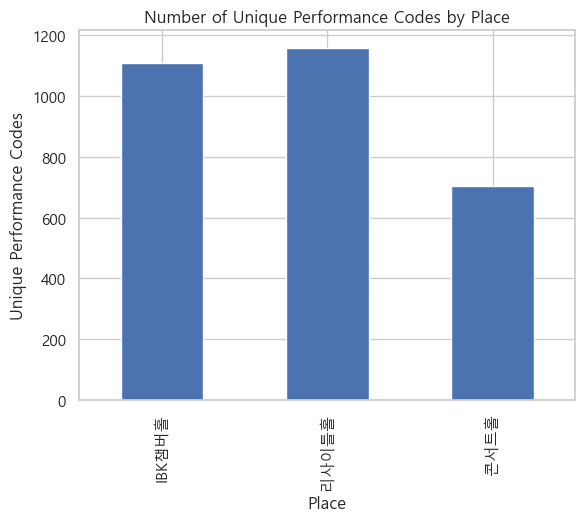

In [6]:
result = df1.groupby('place')['performance_code'].apply(lambda x: x.nunique())

# 시각화
result.plot(kind='bar')
plt.xlabel('Place')
plt.ylabel('Unique Performance Codes')
plt.title('Number of Unique Performance Codes by Place')
plt.show()

- 공연장에 비해 공연자들의 대여가 많지 않은 편 ( 공연의 수 )
- 이는 대관료 때문일수도, 장소 자체가 주는 압박감 때문일수도 있다. 

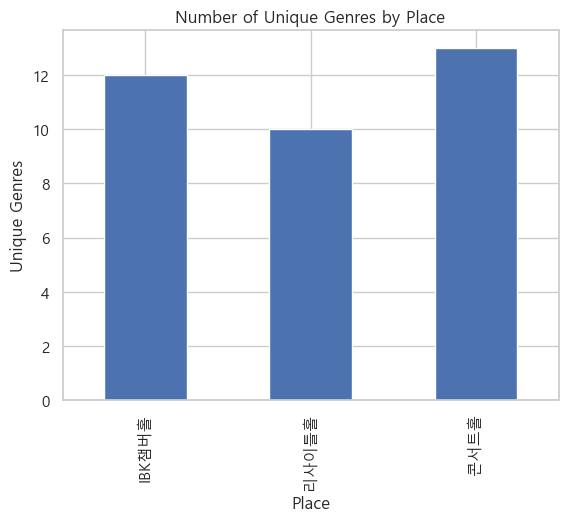

In [7]:
result = df1.groupby('place')['genre'].apply(lambda x: x.nunique())

# 시각화
result.plot(kind='bar')
plt.xlabel('Place')
plt.ylabel('Unique Genres')
plt.title('Number of Unique Genres by Place')
plt.show()

- 공간의 크기와 수용가능 인원에 비하여, 장르의 다양성은 크게 높지 않음

## 2. 고객 특성

### 2-1) Age

- 40대 및 50대가 각각 약 23%, 30대는 약 17% 60대와 20대는 각각 16%, 12.2%의 분포를 가진다.  

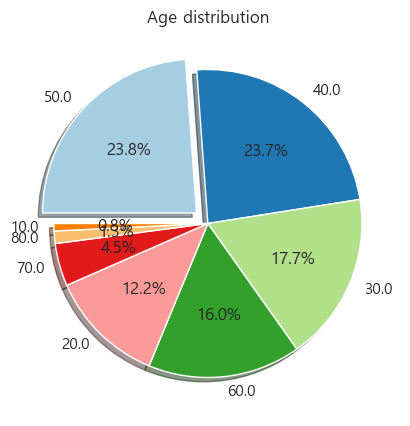

In [8]:
age_distribution = df['age'].value_counts()

pastel_palette = sns.color_palette("Paired", len(age_distribution))

explode = (0.1,) + (0,) * (len(age_distribution) - 1)

plt.figure(figsize=(5, 5))
plt.pie(age_distribution, labels=age_distribution.index, startangle=180, explode=explode, autopct='%1.1f%%', colors=pastel_palette, shadow=True, counterclock=False)

plt.title('Age distribution')

plt.show()


### 2-2) Gender

- 여성은 28%, 남성은 15% 정도 분포함을 확인할 수 있다.  
- 결측치 비율의 경우 데이터의 55.8%가 차지함을 확인할 수 있다.

In [9]:
df.gender.value_counts(dropna=False)

NaN    612101
F      315604
M      169263
Name: gender, dtype: int64

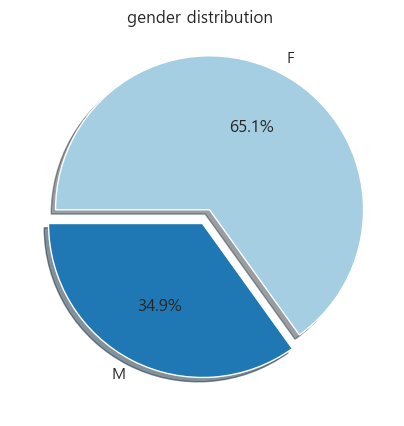

In [10]:
age_distribution = df['gender'].value_counts()

pastel_palette = sns.color_palette("Paired", len(age_distribution))

explode = (0.1,) + (0,) * (len(age_distribution) - 1)

plt.figure(figsize=(5, 5))
plt.pie(age_distribution, labels=age_distribution.index, startangle=180, explode=explode, autopct='%1.1f%%', colors=pastel_palette, shadow=True, counterclock=False)

plt.title('gender distribution ')

plt.show()

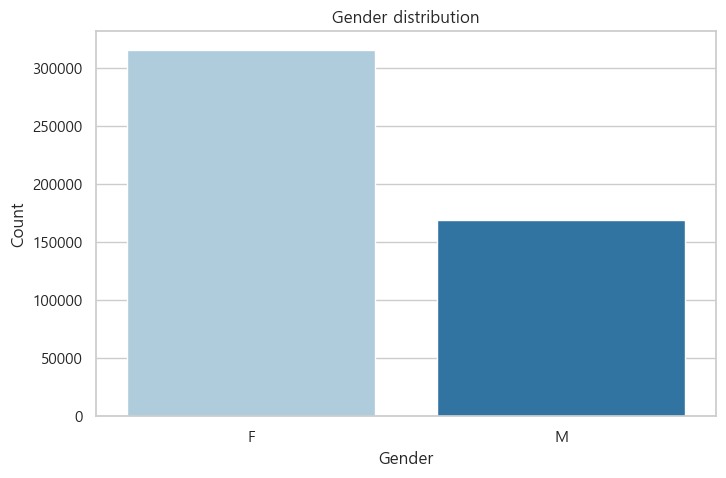

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

gender_distribution = df['gender'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette="Paired")

plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.xticks(rotation=0) 

plt.show()


### 2-3) membership_type

멤버쉽 타입의 결측치는 아래와 같다. 

- membership_type_1 	 55.80%
- membership_type_2 	 64.47%
- membership_type_3 	 87.19%
- membership_type_4 	 97.71%
- membership_type_5 	 99.90%
- membership_type_6 	 100.00%

1. membership_type_1의 경우, 골드, 무료, 블루  
2. membership_type_2의 경우, 무료, 그린, 싹틔우미, 골드, 노블  
3. membership_type_3의 경우, 그린, 무료, 싹틔우미, 노블  
4. membership_type_4의 경우, 그린, 싹틔우미, 노블  
5. membership_type_5의 경우, 그린  
의 값을 지닌다.

1. membership_type_1 : 무료의 비율이 가장 높았다.

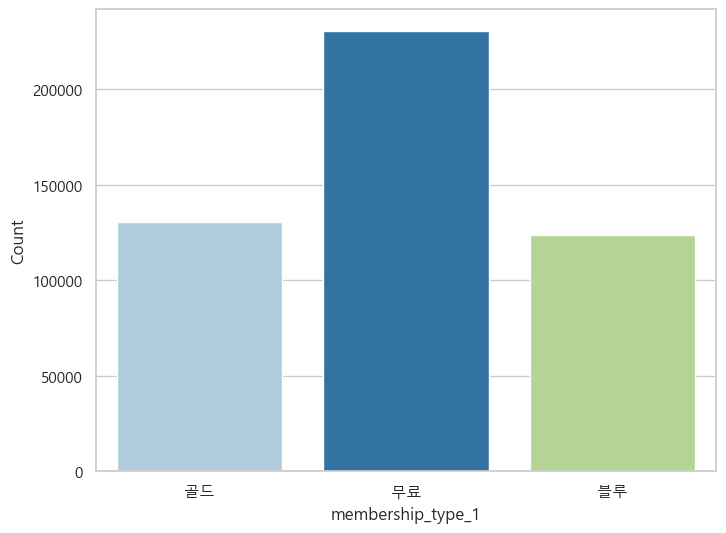

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='membership_type_1', data=df, palette="Paired")

plt.xlabel('membership_type_1')
plt.ylabel('Count')

plt.xticks(rotation=0)

plt.show()

2. membership_type_2 : 무료의 비율이 가장 높았다.

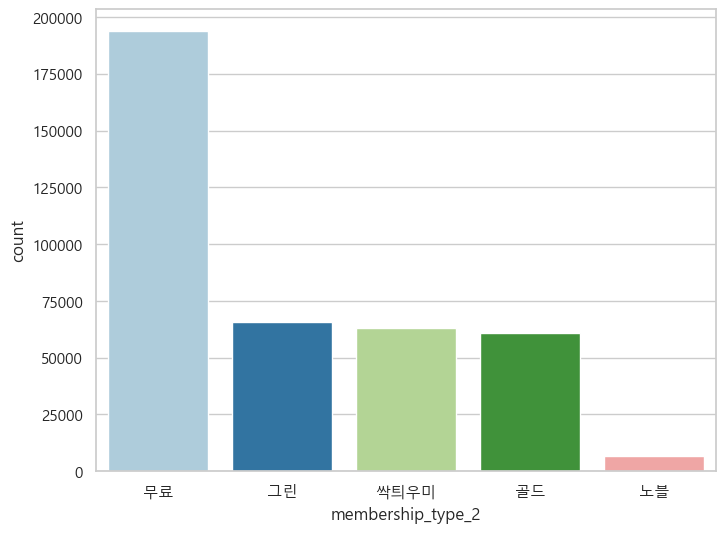

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='membership_type_2', data=df,palette="Paired")
plt.show()

3. membership_type_3 : 무료의 비율과 그린의 비율이 가장 높았다.

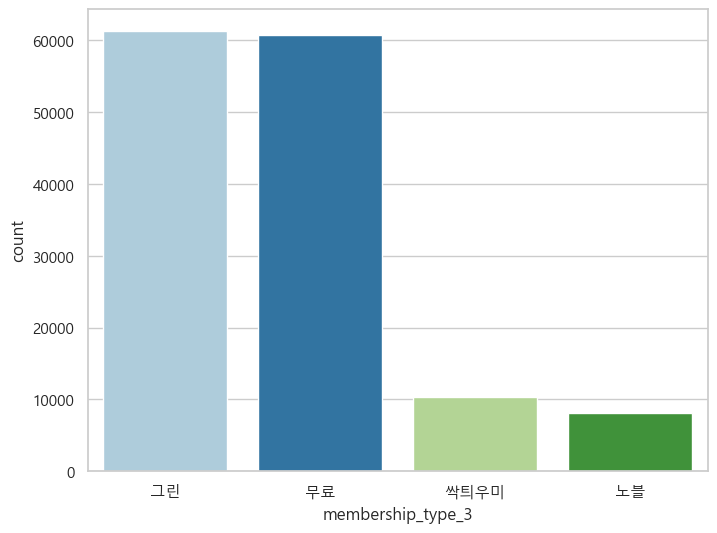

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='membership_type_3', data=df,palette="Paired")
plt.show()

4. membership_type_4 : 그린의 비율이 가장 높았다.

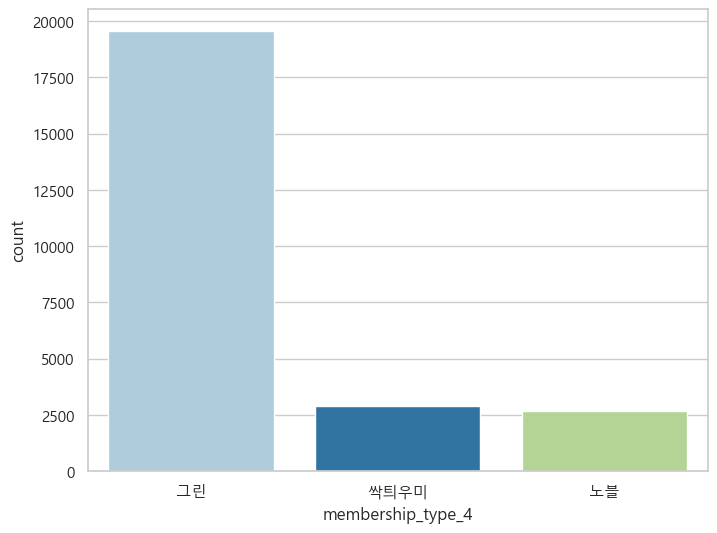

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='membership_type_4',data=df,palette="Paired")
plt.show()

5. membership_type_5 : 그린의 비율이 가장 높았다.

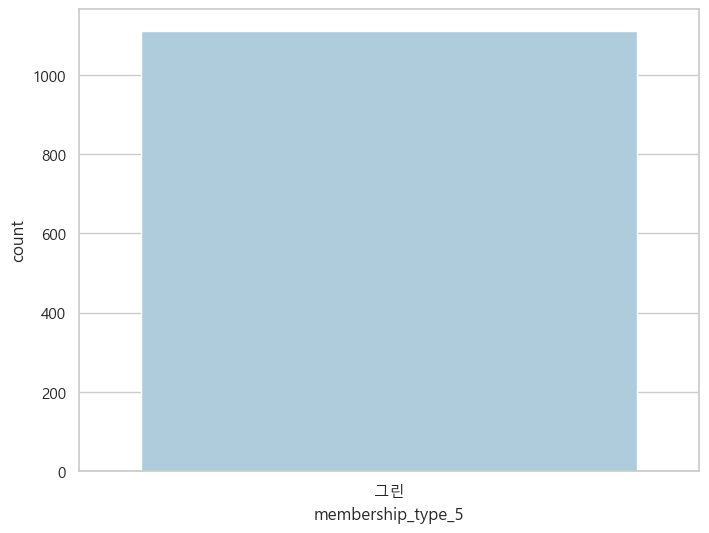

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='membership_type_5', data=df,palette="Paired")
plt.show()

6. membership_type_6 : membership_type_6의 경우 모든 값이 결측치 값을 갖는다.

In [17]:
df['membership_type_6'].isnull().sum()

1096968

## 3. 장르 분석

- 장르의 경우, 교향곡이 1순위로 가장 많은 장르로 꼽혔으며, 2순위는 독주, 3순위는 실내악, 다음으로는 클래식, 오페라, 합창, 성악이 뒤를 이었다.

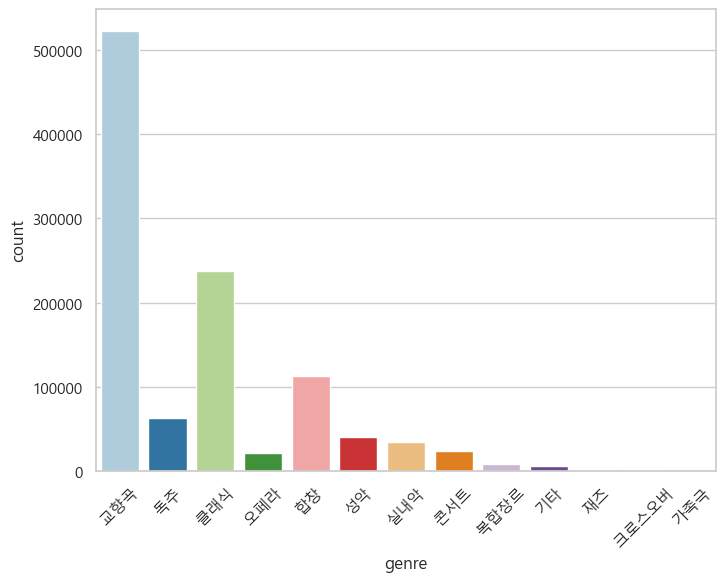

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='genre', data=df, palette="Paired")
plt.xticks(rotation=45)  
plt.show()

- 또한 장르에 대한 가격을 평균화하였을 때, 복합장르가 가장 높았으며, 2순위로 재즈, 3순위는 클래식이 뒤를 이었다. 

In [19]:
df.groupby('genre')['price'].mean()

genre
가족극      12838.709677
교향곡      29456.259298
기타        1032.175252
독주       68748.972489
복합장르     44741.298105
성악       25997.994305
실내악      29506.021272
오페라      10955.912839
재즈       39985.185185
콘서트      18621.665691
크로스오버    16018.614271
클래식      36377.315733
합창        7143.690392
Name: price, dtype: float64

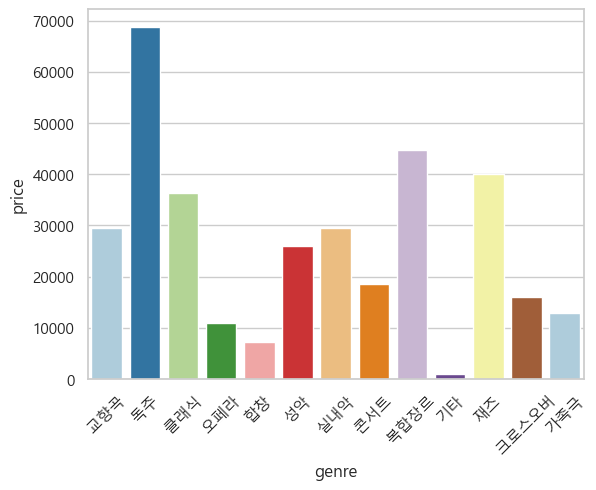

In [20]:
sns.barplot(data=df, x="genre", y="price", ci=None, palette="Paired")
plt.xticks(rotation=45) 
plt.show()

## 4. 공연 수요 분석

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


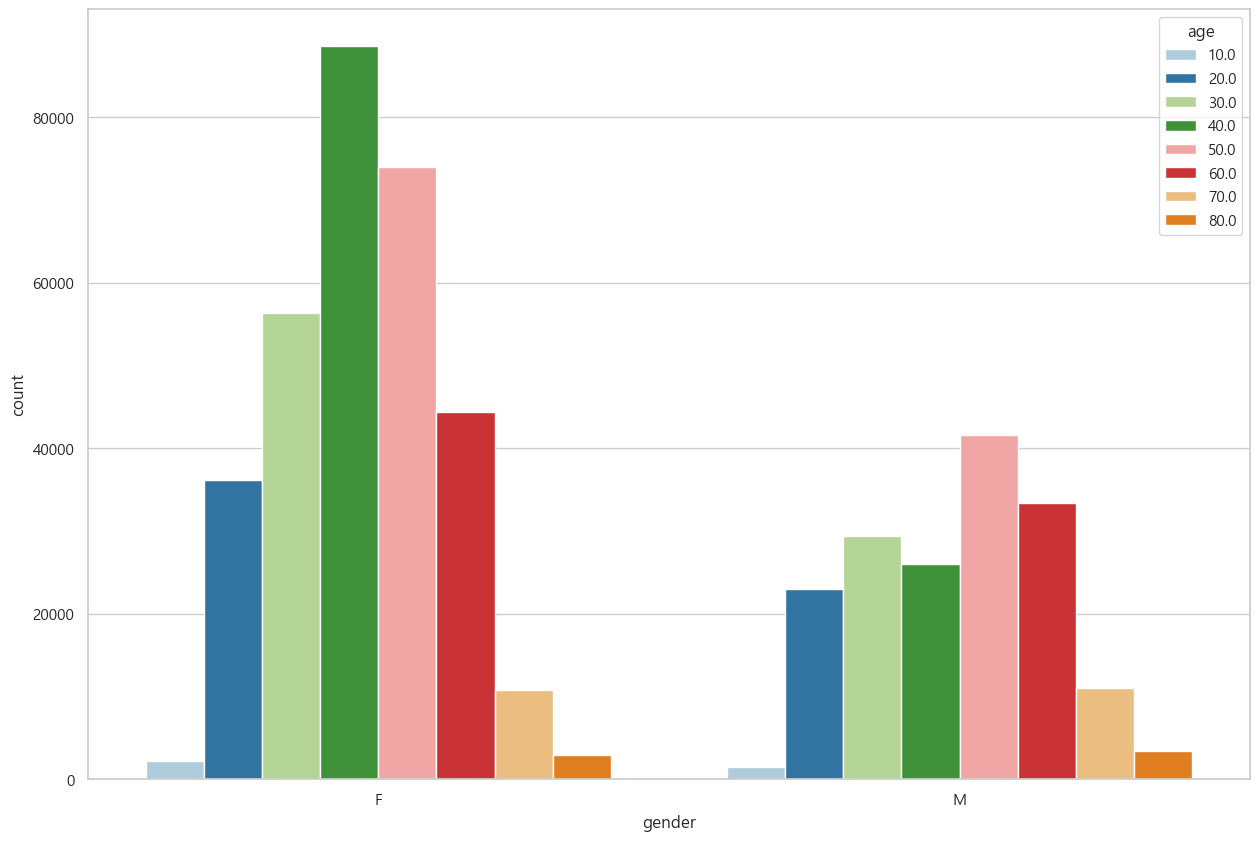

In [21]:
plt.figure(figsize=(15,10))
plt.legend(fontsize = 15)
sc = sns.countplot(x='gender', data=df, hue='age', palette="Paired");

- 여성의 경우, 40대가 공연에 대한 수요가 가장 높고, 남성의 경우 50대가 공연에 대한 수요가 가장 높았다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


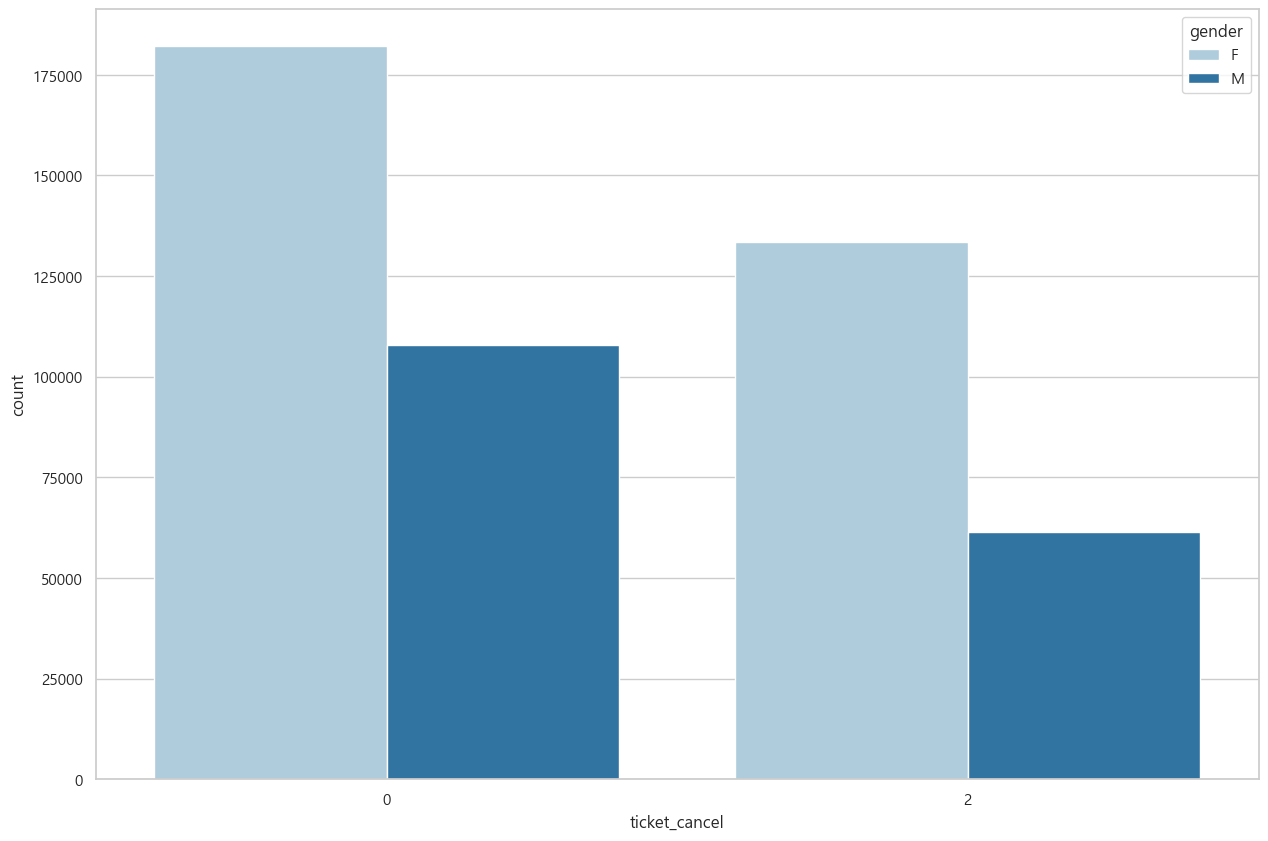

In [22]:
plt.figure(figsize=(15,10))
plt.legend(fontsize = 15)
sc = sns.countplot(x='ticket_cancel', data=df, hue='gender',palette="Paired")

- 여성과 남성 둘 다 , 티켓 취소를 하지 않은 경우가 더 많았다.  
- 둘 중, 여성이 티켓 취소를 하지 않은 경우의 빈도수가 더 높았다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


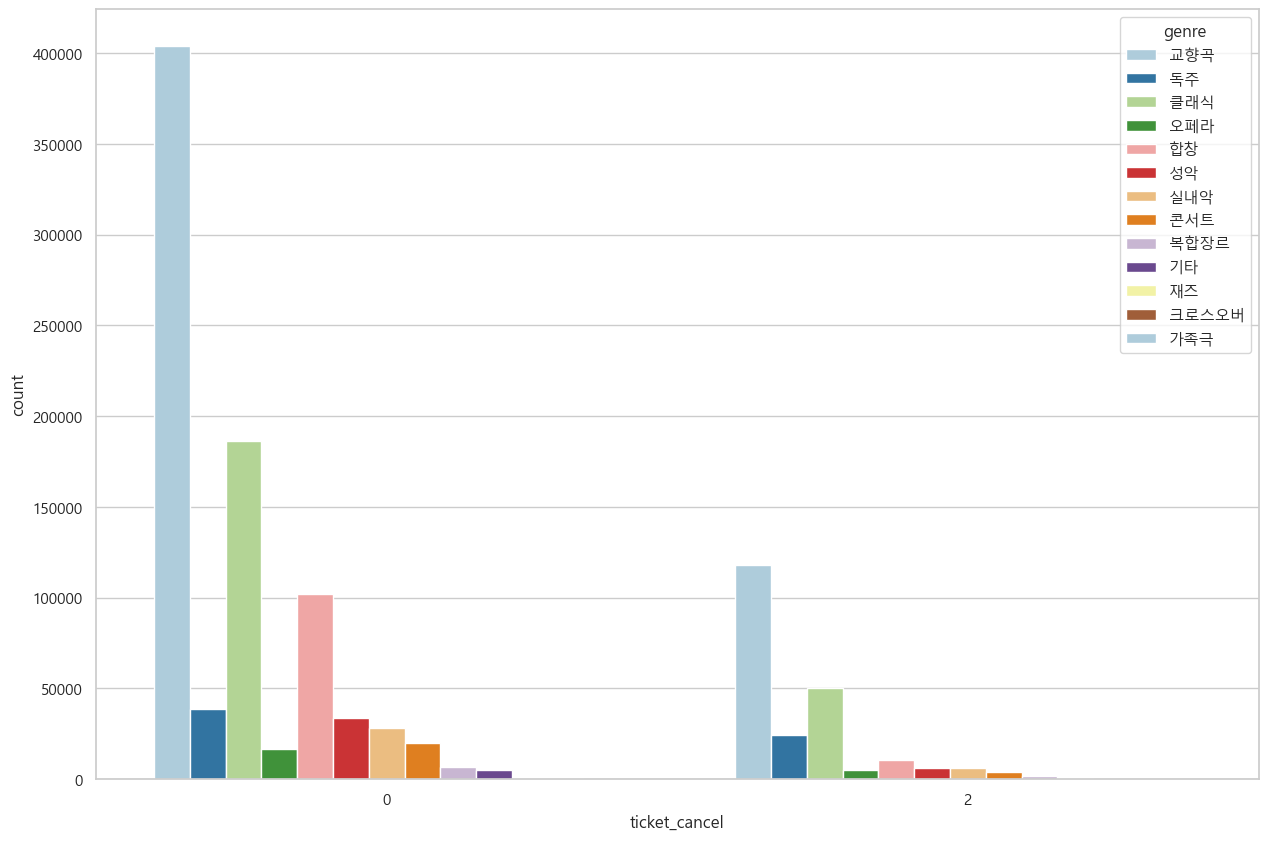

In [23]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(15, 10))
plt.legend(fontsize=7)
sc = sns.countplot(x='ticket_cancel', data=df, hue='genre', palette="Paired")

plt.show()


- 장르별 티켓 취소 여부의 분포에 대한 그래프이다.  
- 티켓 취소 비율이 높은 경우의 장르는 교향곡임과 동시에, 티켓 취소 비율이 낮은 경우의 장르도 교향곡이다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


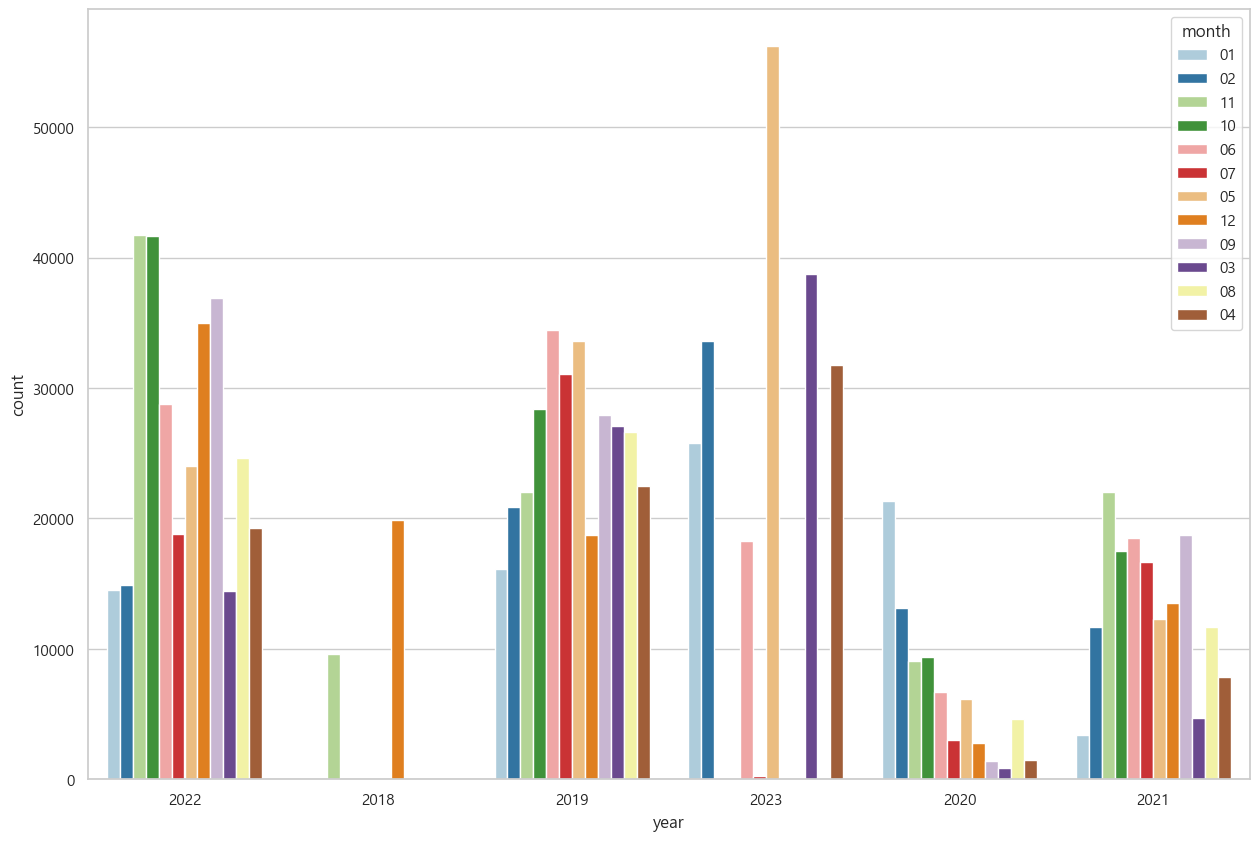

In [24]:
df['tran_date'] = df['tran_date'].astype('str')
df['year'] = df['tran_date'].map(lambda x:x[:4])
df['month'] = df['tran_date'].map(lambda x:x[4:6])

plt.figure(figsize=(15,10))
plt.legend(fontsize = 15)
sc = sns.countplot(x='year', data=df, hue='month',palette="Paired"
                  )

- 년도별 공연 관람 count를 시각화한 그래프이다.  
- 2023년의 경우, 5월이 가장 많은 수요를 차지했고, 년도별로 비교해보았을 때, 대체적으로 5월을 포함한, 3월, 6월, 10월, 11월 또한 상위권을 차지했다. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


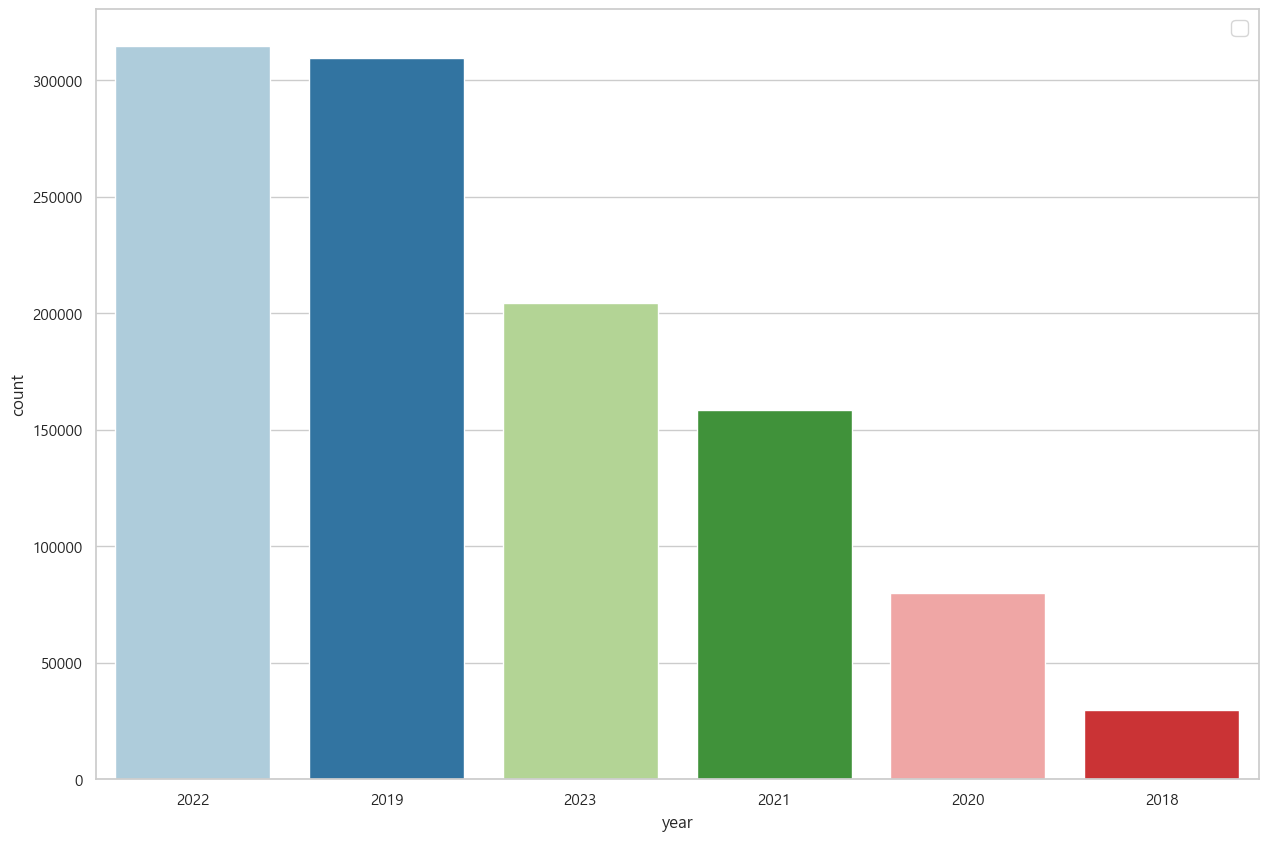

In [25]:
# 2020년 코로나 발생, 2022년 하반기 코로나 해제
plt.figure(figsize=(15,10))
plt.legend(fontsize = 15)
order = df['year'].value_counts().index
sc = sns.countplot(x='year', data=df, order=order, palette="Paired")

- 코로나가 발생했던, 2020년부터 2021년까지 수요가 확 줄었고, 2022년 하반기에 해제 되면서 수요가 다시 증가한 것으로 보인다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


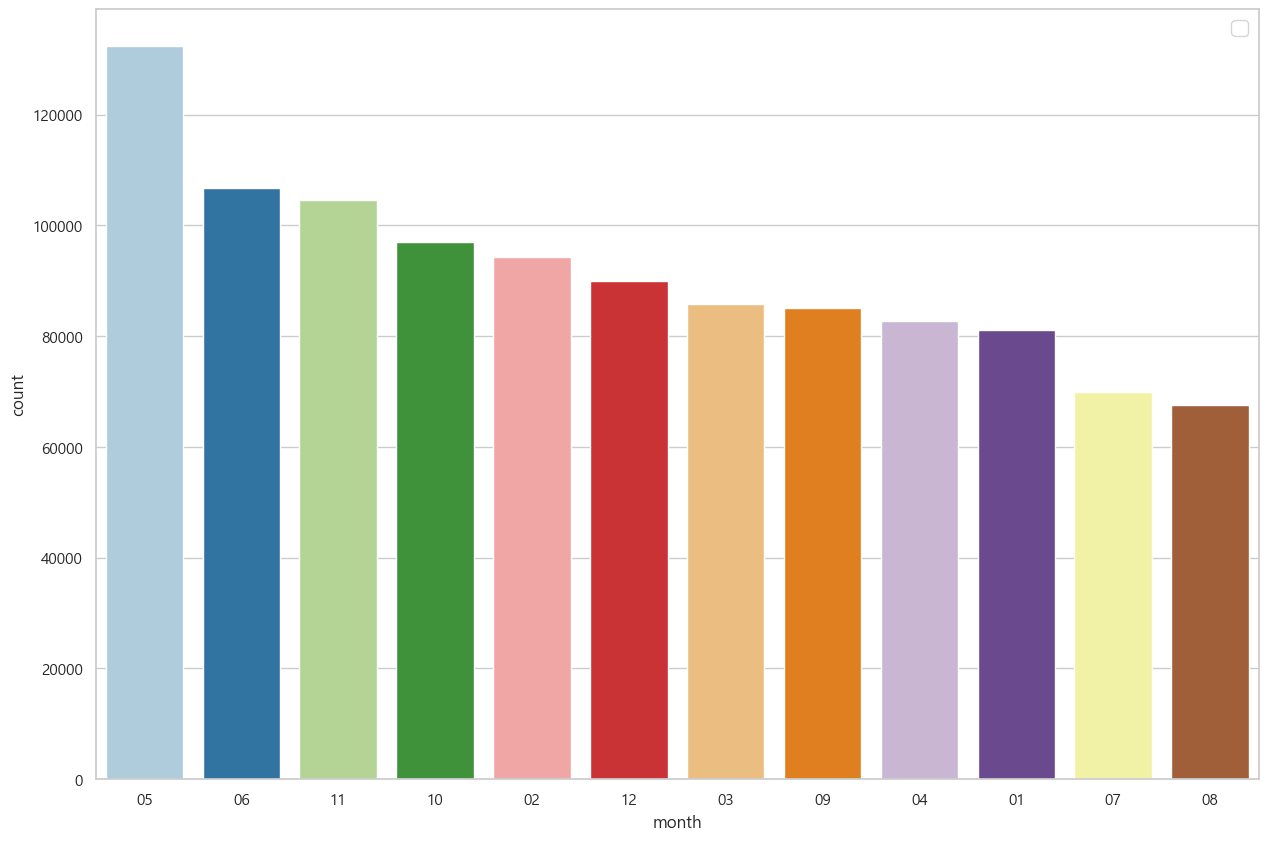

In [26]:
plt.figure(figsize=(15,10))
plt.legend(fontsize = 15)
order2 = df['month'].value_counts().index
sc = sns.countplot(x='month', data=df, order=order2, palette="Paired")

- 월별 공연의 수요를 확인한 그래프이다. 5월의 수요가 가장 높았고, 6월, 11월이 뒤를 이었다.

## 5. 고객 만족도, 수익성, 공공성 분석 결과

### 5-1) 고객 만족도

In [27]:
#티켓 취소에 따른 만족도  
df.ticket_cancel.value_counts()/len(df)

0    0.787735
2    0.212265
Name: ticket_cancel, dtype: float64

- 약 79%는 티켓 취소 없이 관람한다.  
- 대부분의 공연들은 취소가 이루어지지 않았다.

In [28]:
#재관람 여부 비율
df['discount_type'].str.contains('재관람').astype('int').value_counts()/len(df)

0    0.999452
1    0.000548
Name: discount_type, dtype: float64

- 재관람 비율은 약 0.0005%

In [29]:
df['discount_type'].str.contains('골드|그린|블루|법인').astype('int').value_counts()/len(df)

0    0.809427
1    0.190573
Name: discount_type, dtype: float64

- 구매 당시 유료회원인 경우 : 0.19%

### 5-2) 수익성

In [30]:
#장르별 공연 평균 수익
df.groupby('genre')['price'].mean().sort_values(ascending=False)

genre
독주       68748.972489
복합장르     44741.298105
재즈       39985.185185
클래식      36377.315733
실내악      29506.021272
교향곡      29456.259298
성악       25997.994305
콘서트      18621.665691
크로스오버    16018.614271
가족극      12838.709677
오페라      10955.912839
합창        7143.690392
기타        1032.175252
Name: price, dtype: float64

- 장르별 공연의 평균 수익에 대한 결과로는, 장르 별로 비슷한 평균 price 가 거의 없다.  그만큼 price 의 형성과 그로 인한 수익성 창출에 장르가 큰 영향을 미칠 것으로 추정된다.  

### 5-3) 공공성

In [31]:
#공연별 취약 계층 비율

o_1=df[df.discount_type.str.contains('65세|실버|유족|학생|경로|장애|노블|의사상|임산|청소년|청년|유공|어린이|의상')]

a= pd.DataFrame(o_1.groupby('performance_code')['price'].count() / df.groupby('performance_code')['price'].count())

a['price'].describe()


count    641.000000
mean       0.064022
std        0.069605
min        0.000389
25%        0.011709
50%        0.037957
75%        0.090786
max        0.347774
Name: price, dtype: float64

- 65세|실버|유족|학생|경로|장애|노블|의사상|임산|청소년|청년|유공|어린이|의상 가 포함된 discount_type을 취약 계층으로 정의 후, 공연별로 취약 계층 비율을 계산한 결과이다.     
- 공연별 취약 계층 비율에 대해 분석한 결과, 평균적으로 공연당 0.03% 정도만이 공공성을 띄는 공연의 결과가 나왔다. 